# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: Classification. Because the response variable is a binary one not a continuous one. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as pl

# Pretty display for notebooks
%matplotlib inline

# Read student data
student_data = pd.read_csv("student-data.csv")
print ("Student data read successfully!")



Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
n_passed = sum(student_data['passed'].str.lower()=='yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed'].str.lower()=='no')

# TODO: Calculate graduation rate
grad_rate = n_passed/n_students

# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        # To better distinguish between the binary variables and the categorical varuables 
        if col_data.dtype == object :
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object :
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output



X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here
import random

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
random.seed(312)
shuffled_index=list(range(0,X_all.shape[0])) #cannot do a=random.shuffle(a)
random.shuffle(shuffled_index)

X_train = X_all.iloc[shuffled_index[:num_train],]
X_test =  X_all.iloc[shuffled_index[num_train:],]
y_train = y_all.iloc[shuffled_index[:num_train]]
y_test = y_all.iloc[shuffled_index[num_train:]]

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: The 3 models I chose to use are Random Forest, SGDC and SVM.
1. Random Forest
    * Real word application: classify costumers when launching new business campaign 
    * Strengths: compare to decision tree, the advantage of random forest is that it belongs to the ensemble learning algorithm which may avoid overfitting
    * Weaknesses: 
        * Because we need to build multiple tress, the running time will be slow
        * For continuous features, need to first create some 'discrete' values to represent the continuous features, which may lose some information and also slow down the running time
        * If we have a lot features and those features have a lot of discrete values, may still be overfitting because the single decision tree in the random forest may overfit. 
For this data set, the response variable is binary and the number of features are not very large and most of the features are categorical. So I think random forest will be suitable. 
2. Stochastic Gradient Descent (SGDC)
    * Real word application: SGDC can applied to real word applications using linear regression, logistic regression, SVM, neural network and so on. One of the applications is picture identification using neural network. 
    * Strengths: it can efficiently find the local optimal estimates. Also, the computation time is fast because it can use parallel computation. 
    * Weakness: may only find the local optimal estimates instead of the global optimal estimates
For this data set, we can use the SGDC algorithm to fit a linear SVM or a logistic regression model.
3. SVM
    * Real word application: Protein Fold and Remote Homology Detection
    * Strengths: 
        * Can use the kernel trick to represent the arbitrary similarity
        * Use regularization to avoid overfit 
    * Weakness: choosing a complexed kernel may still introduce overfitting
I cannot think of any reason indicating SVM would not be suitable for this data set. 
                  
                  


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.ensemble import RandomForestClassifier

# from sklearn import model_B
from sklearn.linear_model import SGDClassifier

# from skearln import model_C
from sklearn.svm import SVC





# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state=312)
clf_B = SGDClassifier(random_state=312)
clf_C = SVC(random_state=312)



# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]       
        

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
#clfs=[clf_A, clf_B, clf_C]
#for i in range(0, len(clfs)):
train_predict(clf_A,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A,X_train_300, y_train_300, X_test, y_test)
print('\n')


train_predict(clf_B,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B,X_train_300, y_train_300, X_test, y_test)
print('\n')

train_predict(clf_C,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C,X_train_300, y_train_300, X_test, y_test)
print('\n')



Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0100 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7429.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0090 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9963.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7518.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0126 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9923.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7313.


Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0005 seconds
Made predictions in 0.0213 seconds.
F1 score for training set: 0.8609.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7867.
Training a SGDClassifier using a traini

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0130 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7429.
Made predictions in 0.0020 seconds.
Made predictions in 0.0040 seconds.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0140 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9963.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7518.
Made predictions in 0.0030 seconds.
Made predictions in 0.0060 seconds.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0236 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9923.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7313.
Made predictions in 0.0020 seconds.
Made predictions in 0.0010 seconds.


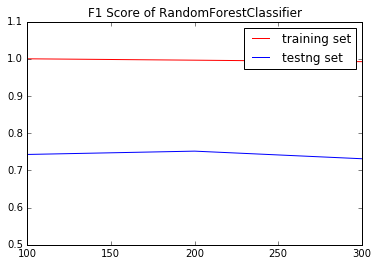

Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0015 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8609.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7867.
Made predictions in 0.0000 seconds.
Made predictions in 0.0000 seconds.
Training a SGDClassifier using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8072.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8415.
Made predictions in 0.0000 seconds.
Made predictions in 0.0000 seconds.
Training a SGDClassifier using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.7950.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7612.
Made predictions in 0.0000 seconds.
Made predictions in 0.0000 seconds.


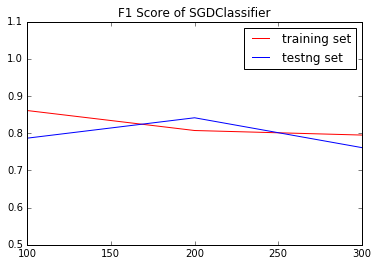

Training a SVC using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9007.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8280.
Made predictions in 0.0010 seconds.
Made predictions in 0.0010 seconds.
Training a SVC using a training set size of 200. . .
Trained model in 0.0050 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8816.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.8101.
Made predictions in 0.0030 seconds.
Made predictions in 0.0020 seconds.
Training a SVC using a training set size of 300. . .
Trained model in 0.0100 seconds
Made predictions in 0.0080 seconds.
F1 score for training set: 0.8711.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.7871.
Made predictions in 0.0080 seconds.
Made predictions in 0.0040 seconds.


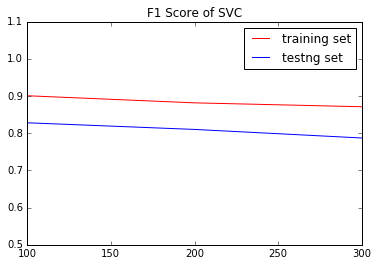

In [9]:
# use plots to visualiza the results
def model_fit(clf, X_train, y_train, X_test, y_test):
    ''' Train the model using different size of the training samples. '''
    score_train=[]
    score_test=[]
    for i in range(1,4):
        X_train_temp=X_train[:i*100]
        y_train_temp=y_train[:i*100]
        train_predict(clf,X_train_temp, y_train_temp, X_test, y_test)
        score_train.append(predict_labels(clf, X_train_temp, y_train_temp))
        score_test.append(predict_labels(clf, X_test, y_test))
    
    
    a,=pl.plot([100,200,300], score_train, 'r-', label='training set')
    b,= pl.plot([100,200,300], score_test, 'b-', label='testng set')  
    pl.ylim([0.5,1.1])
    pl.title("F1 Score of {}".format((clf.__class__.__name__)))
    pl.legend(handles=[a, b])
    pl.show()
    
model_fit(clf_A, X_train, y_train, X_test, y_test)
model_fit(clf_B, X_train, y_train, X_test, y_test)
model_fit(clf_C, X_train, y_train, X_test, y_test)


    


### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - RandomForestClassifier **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | 
| 100               |         0.0100                |      0.0030                  |       1.0000           |    0.7429             |
| 200               |        0.0196          |      0.0015                  |      0.9963            |         0.7518        |
| 300               |    0.0311                      |      0.0040                  |     0.9923             |    0.7313      |

** Classifer 2 - SGDClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0010                     |     0.0010                    |        0.8609          |     0.7867            |
| 200               |     0.0010              |     0.0000                    |       0.8072           |        0.8415         |
| 300               |        0.0010                 |     0.0000                   |        0.7950          |     0.7612     |

** Classifer 3 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0015                   |       0.0010                 |      0.9007            |       0.8280          |
| 200               |       0.0060                   |        0.0020                 |         0.8816         |     0.8101            |
| 300               |        0.0140                  |        0.0050                  |        0.8711          |      0.7871           |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** In terms of the computational time, generally speaking, all 3 models were very fast. Stochastic Gradient Descent is the fastest algorithm and random forest is the slowest.  
For model performance, random forest seems to have serious over-fitting. Although the f1 scores for the training sets are very high, there is a big jump of f1 score from training set to testing set. I learned that ensemble learning tends to avoid overfitting by finding a weak learner in each step. However, the random forest algorithm still has obvious overfitting issue here, which may be because that the decision trees in the forest are very complexed and they suffer from over-fitting issue. Adjusting some of the parameter settings, for example, setting a the max_depth or increasing the min_samples_split to force simpler tree in the forest, may solve the overfitting issue. Also, for the default setting, the forest only contains 10 trees, so each tree plays an important role in the prediction. Below I tried to set the max_depth=5, although the f1 scores of the training sets decreases, the f1 score of the testing sets increased and the overfitting issue seemed to be less serious.  

SGDClassifier generates a fairly good prediction with no obvious overfitting. When the training set size equals to 200, the testing f1 score even got to 0.84. However, one interesting pattern is that when adding more samples to the training set (from 200 to 300), both the f1 score for the training set and the testing set droped.

Support Vector Machine also worked pretty well with f1 scores of the testing sets at around 0.80. However, it's a bit surprising that adding more samples to the training set also seems to do no help. One possible reason for this surprising pattern is that some of the parameters were not set at the appropriate value.

Although SGDClassifier performed a little worse than Support Vector Machine, I chose to tune the parameters of SGDClassifier because it once achieved the highest f1 score of 0.84 and it is faster. 




In [11]:
clf_rf=RandomForestClassifier(max_depth=5, random_state=312)
train_predict(clf_rf,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_rf,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_rf,X_train_300, y_train_300, X_test, y_test)
print('\n')


Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0110 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9710.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7974.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0150 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8933.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8158.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0170 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8578.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7895.




### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** The goal of the stochastic gradient descent algorithm is to estimate parameters in order to minimize the loss function. The loss function is a way to measure the discrepancy between the predicted labels (or values) and the true labels. The larger the discrepancy is, the larger the value of the loss function is. Gradient descent is one of the algorithms which minimizes the loss function by finding the appropriate estimates. Since it's difficult to get the minimum all at one step, we do it iteratively by taking baby steps along the gradient (deepest direction of the function) in each iteration. So, eventually, we will arrive at the local minimal point.  
Stochastic gradient descent is a special kind of gradient descent. For each iteration, instead of using all the examples to build the loss function and update the estimates, it divides the examples into small batches (or even 1 sample per batch). Then, in each iteration, it only takes the small batch into account which will make the algorithm more efficient because you do not need to load and compute all data every time, and parallel computations can be conducted.  
Therefore, by minimizing the loss function, we will get a prediction model which generates predictions close the true values.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [12]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'loss' : ['hinge', 'log', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.005, 0.01],
              'n_iter' : [5, 20, 50, 100]
             }

# TODO: Initialize the classifier
clf = SGDClassifier(random_state=312)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetri

SGDClassifier(alpha=0.005, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=20, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=312, shuffle=True,
       verbose=0, warm_start=False)
Made predictions in 0.0005 seconds.
Tuned model has a training F1 score of 0.6278.
Made predictions in 0.0005 seconds.
Tuned model has a testing F1 score of 0.6727.


After tuning the parameters of the SGDClassifier, I got a model with much lower F1 scores for both training set and testing set, which is very surprising. I also got many warning messages, which suggests that some models did not predict a single true positive predictions. To further investigate, I tried to use training size of 100 and 200.

In [13]:
print ("Training size of 100")
grid_obj.fit(X_train_100, y_train_100)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning

print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train_100, y_train_100)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

print ("Training size of 200")
grid_obj.fit(X_train_200, y_train_200)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning

print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train_200, y_train_200)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Training size of 100
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=20, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=312, shuffle=True,
       verbose=0, warm_start=False)
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8831.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8000.
Training size of 200
SGDClassifier(alpha=0.005, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=312, shuffle=True,
       verbose=0, warm_start=False)
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8356.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8027.


C:\Users\Anqi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The models using the training size of 100 and 200 seem to work fine. I wonder why the complete training set did work well. I tried to see the distributions of the response variable for the different training sets and the distributions seem to be similar. It seems that the SGD algorithm is not suitable for this data set. It keeps generating predictors with no true positive predictors at all but I am not sure about the reason. 

In [16]:
print("size:100, 'yes': {} ({})".format(list(y_train_100).count('yes'), list(y_train_100).count('yes')/100))
print("size:200, 'yes': {} ({})".format(list(y_train_200).count('yes'), list(y_train_200).count('yes')/200))
print("size:300, 'yes': {} ({})".format(list(y_train_300).count('yes'), list(y_train_300).count('yes')/300))


size:100, 'yes': 68 (0.68)
size:200, 'yes': 134 (0.67)
size:300, 'yes': 196 (0.6533333333333333)


Since the SGD model did not work quite well. Below I also tried to tune the parameters for the SVM model.

In [17]:

# TODO: Create the parameters list you wish to tune
parameters_svc = {'C' : [0.1, 0.5, 1],
              'kernel' : ['poly', 'rbf', 'sigmoid'],
             }

# TODO: Initialize the classifier
clf_svc = SVC(random_state=312)


# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj_svc = GridSearchCV(clf_svc, param_grid=parameters_svc, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj_svc.fit(X_train, y_train)

# Get the estimator
clf_svc = grid_obj_svc.best_estimator_
print (clf_svc)


# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf_svc, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf_svc, X_test, y_test)))

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=312, shrinking=True,
  tol=0.001, verbose=False)
Made predictions in 0.0050 seconds.
Tuned model has a training F1 score of 0.8323.
Made predictions in 0.0020 seconds.
Tuned model has a testing F1 score of 0.8250.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** The final model is a support vector machine model, which achieved a F1 score of 0.8250 for the testing set. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.